In [1]:
import torch
from models.yolo import *

device = torch.device(f'cuda:1' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

ckpt = torch.load('/home/ohyoonju/yolov5/runs/train/exp14/weights/best.pt', map_location=device)
#ckpt = torch.load('weights/yolov5m.pt', map_location=device)
#ckpt = torch.load('weights/yolov5_m_0324.pt', map_location=device)
model = Model(ckpt['model'].yaml, ch=3, nc=1, anchors=4.0).to(device)
print(model)

: SiLU()
          )
          (cv2): Conv(
            (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            (act): SiLU()
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (4): C3(
      (cv1): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (cv2): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (cv3

In [2]:
cnt = 0
for k, m in enumerate(model.modules()):
    cnt += 1
    if cnt == 12:
        print(k, m)

11 C3(
  (cv1): Conv(
    (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU()
  )
  (cv2): Conv(
    (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU()
  )
  (cv3): Conv(
    (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU()
  )
  (m): Sequential(
    (0): Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU()
      )
      (cv2): Conv(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn)

In [6]:
for k,m in enumerate(model.modules()):
    if isinstance(m, nn.Conv2d):
    #if isinstance(m, nn.BatchNorm2d):
        # size = m.weight.data.shape[0]
        #bn[index:(index+size)] = m.weight.data.abs().clone()
        print(m.weight.data)
        #print(m.bias.data)

[[ 0.02196]],

         [[ 0.02230]],

         ...,

         [[-0.03099]],

         [[-0.02903]],

         [[-0.02255]]],


        [[[ 0.00318]],

         [[-0.00973]],

         [[-0.03223]],

         ...,

         [[-0.01334]],

         [[-0.03529]],

         [[ 0.02408]]],


        ...,


        [[[ 0.01683]],

         [[ 0.02957]],

         [[-0.02028]],

         ...,

         [[ 0.01505]],

         [[ 0.02184]],

         [[-0.01198]]],


        [[[-0.01942]],

         [[-0.02668]],

         [[ 0.02287]],

         ...,

         [[-0.02896]],

         [[-0.00326]],

         [[-0.01940]]],


        [[[-0.02423]],

         [[-0.03424]],

         [[-0.03052]],

         ...,

         [[-0.03115]],

         [[ 0.01073]],

         [[-0.01704]]]], device='cuda:1')
tensor([[[[ 0.01525]],

         [[-0.00251]],

         [[-0.03480]],

         ...,

         [[-0.01223]],

         [[ 0.01894]],

         [[ 0.01005]]],


        [[[ 0.01471]],

         [[ 

In [4]:
for k, m in model.named_modules():
    if isinstance(m, nn.BatchNorm2d):
        print(m.weight.data)

, 1., 1.], device='cuda:1')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:1')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [3]:
ckpt['training_results']

dict_keys(['epoch', 'best_fitness', 'training_results', 'model', 'optimizer', 'wandb_id'])

In [9]:
ckpt['optimizer']

In [13]:
for i in model.state_dict():
    print(i)


model.0.conv.conv.weight
model.0.conv.bn.weight
model.0.conv.bn.bias
model.0.conv.bn.running_mean
model.0.conv.bn.running_var
model.0.conv.bn.num_batches_tracked
model.1.conv.weight
model.1.bn.weight
model.1.bn.bias
model.1.bn.running_mean
model.1.bn.running_var
model.1.bn.num_batches_tracked
model.2.cv1.conv.weight
model.2.cv1.bn.weight
model.2.cv1.bn.bias
model.2.cv1.bn.running_mean
model.2.cv1.bn.running_var
model.2.cv1.bn.num_batches_tracked
model.2.cv2.conv.weight
model.2.cv2.bn.weight
model.2.cv2.bn.bias
model.2.cv2.bn.running_mean
model.2.cv2.bn.running_var
model.2.cv2.bn.num_batches_tracked
model.2.cv3.conv.weight
model.2.cv3.bn.weight
model.2.cv3.bn.bias
model.2.cv3.bn.running_mean
model.2.cv3.bn.running_var
model.2.cv3.bn.num_batches_tracked
model.2.m.0.cv1.conv.weight
model.2.m.0.cv1.bn.weight
model.2.m.0.cv1.bn.bias
model.2.m.0.cv1.bn.running_mean
model.2.m.0.cv1.bn.running_var
model.2.m.0.cv1.bn.num_batches_tracked
model.2.m.0.cv2.conv.weight
model.2.m.0.cv2.bn.weight
mode

In [15]:
model.state_dict()['model.23.cv1.bn.weight'] 

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

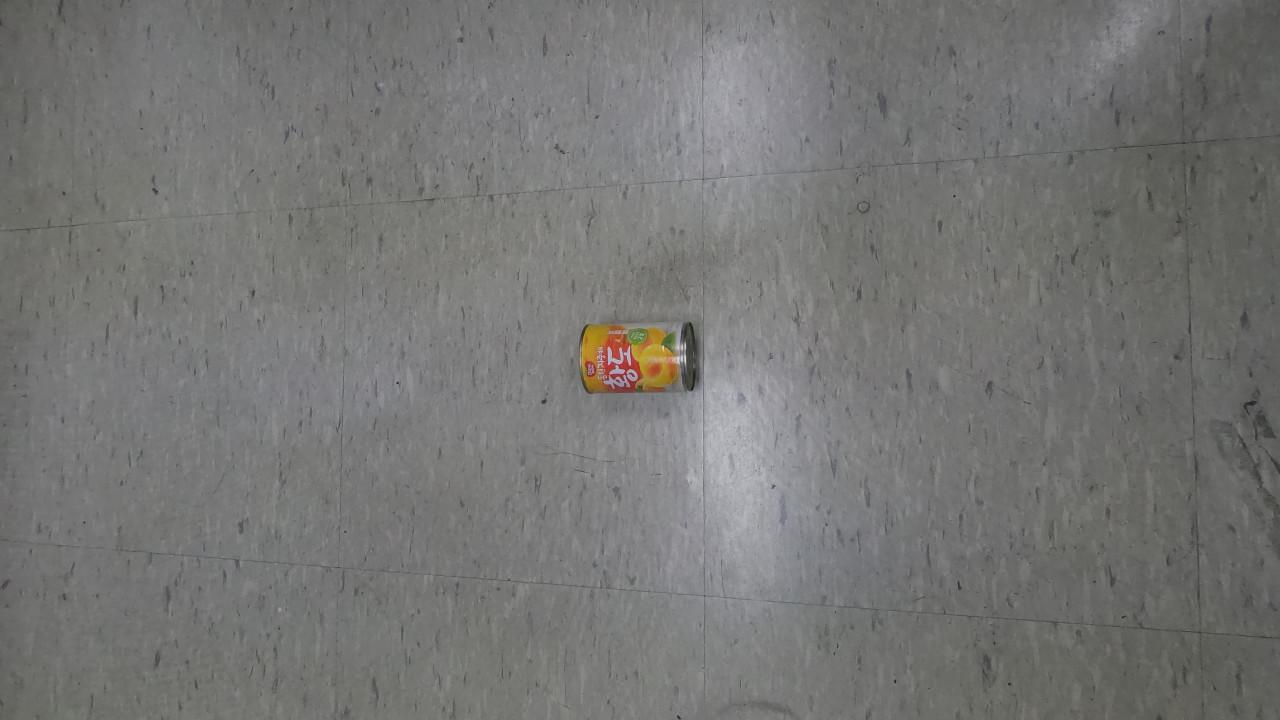

In [3]:
import sparsity_train
from IPython.display import Image
imgs
Image(filename='./dataset/images/val/GOPR5444.jpg')

In [6]:
import cv2
import numpy as np
image = cv2.imread('./dataset/images/val/GOPR5444.jpg')
cv2.imshow("test", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /tmp/pip-req-build-hw4jq8lf/opencv/modules/highgui/src/window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
imgs = np.load('imgs.npy')
imgs = torch.Tensor(imgs)

In [12]:
plt.imshow(imgs[0].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [14]:
plt.imshow(np.array([[1,2],[2,3]]))